In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io
from modules import vascular_data as sv
from modules import sv_image

In [51]:
EXT         = 160
SPACING     = 0.029
W           = EXT*SPACING/2

config_fn = "/home/marsdenlab/projects/seg_regression/scripts/\
config_segment/0144/plot/ext_iliac_left/4.json"

config = io.load_json(config_fn)

PATH_FN     = config['path_files']
IMAGE_FN    = config['image_fn']
GROUP_FNS   = config['group_files']

if "colors" in config:
    COLORS = config['COLORS']
else:
    COLORS = [config['color']]*len(GROUP_FNS)
    
OUT_DIR     = config['out_dir']

In [52]:
io.rmdir(OUT_DIR)
io.mkdir(OUT_DIR)

In [53]:
image = sv_image.Image(IMAGE_FN)
image.set_spacing(SPACING)
image.set_reslice_ext(EXT)

In [54]:
path = io.parsePathPointsFile(PATH_FN)
path_norm = []
for p in path:
    id = str(int(p[0]))
    x  = p[1:4]
    n  = p[4:7]
    t = p[7:10]
    path_norm.append( (id, x, n, t) )


In [55]:
groups = [io.load_json(g) for g in GROUP_FNS]

In [56]:
norm_groups = []
for g in groups:
    d = []
    for p in path_norm:
        id,x,n,t = p
        c  = np.array(g[id])
        c_ = np.vstack((c,c[0]))
        
        c2d = sv.normalizeContour(c_,x,n,t)/W
        d.append(c2d)
    norm_groups.append(d)

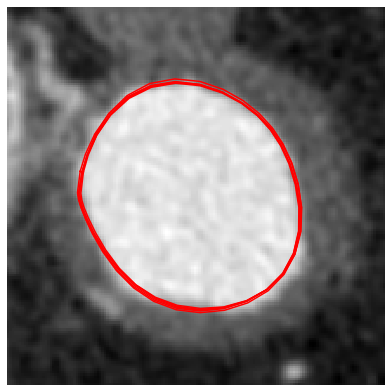

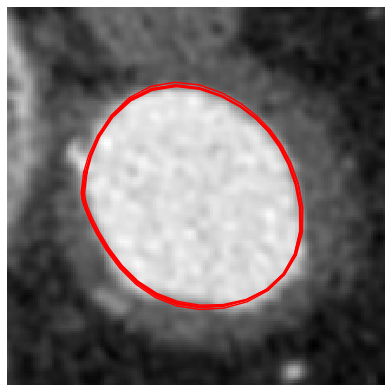

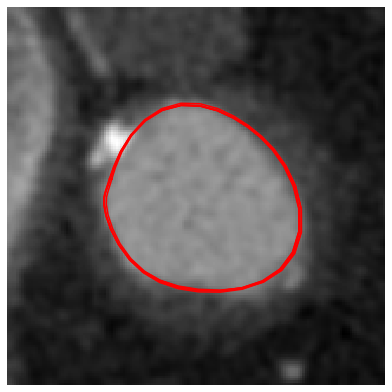

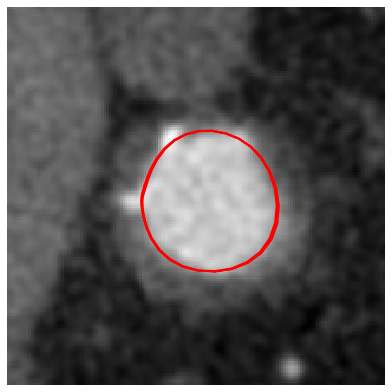

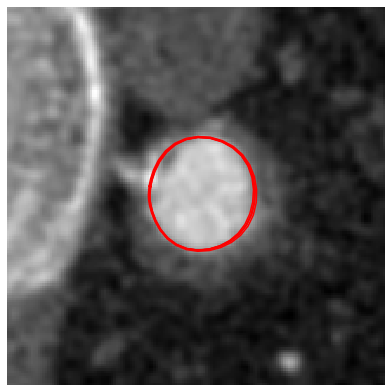

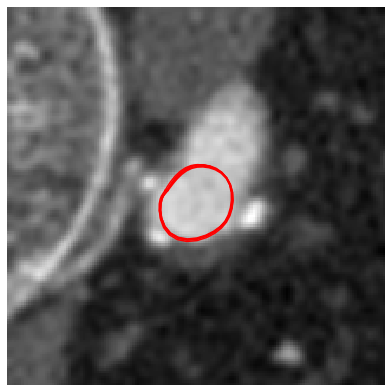

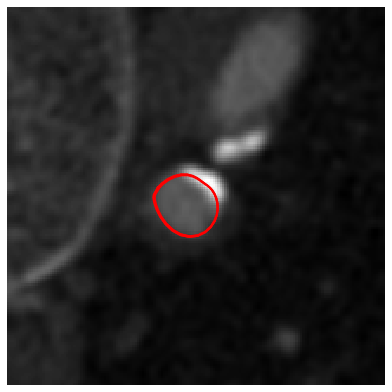

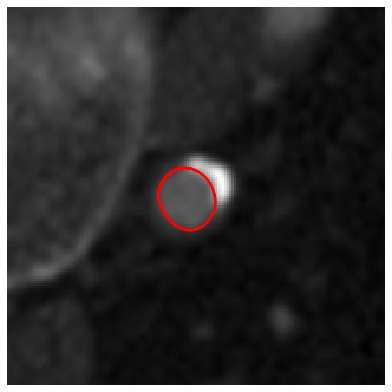

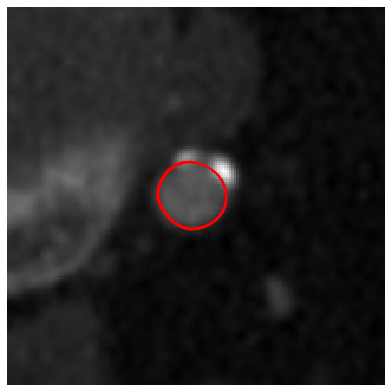

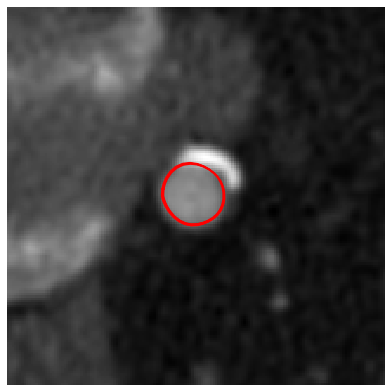

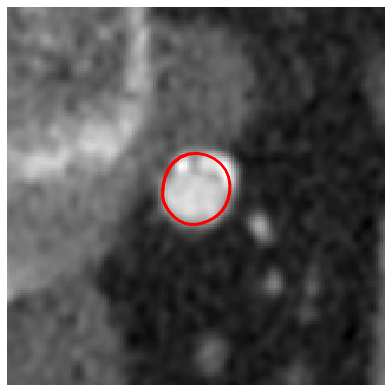

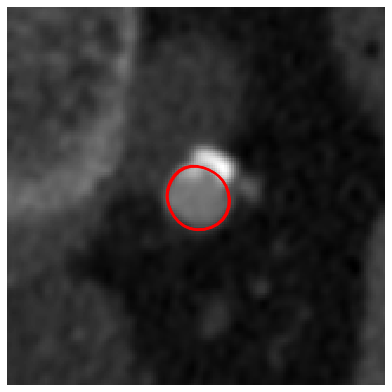

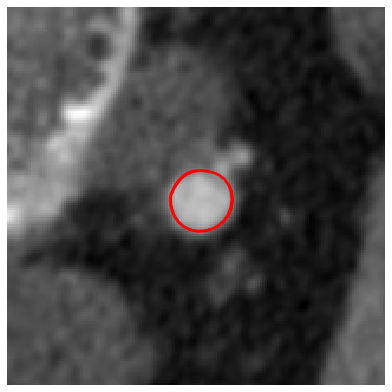

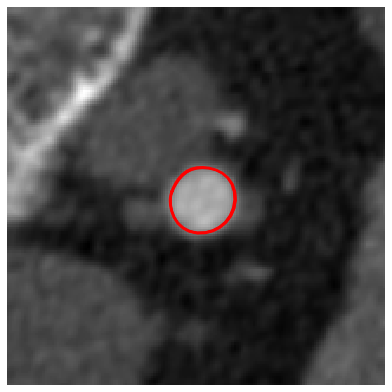

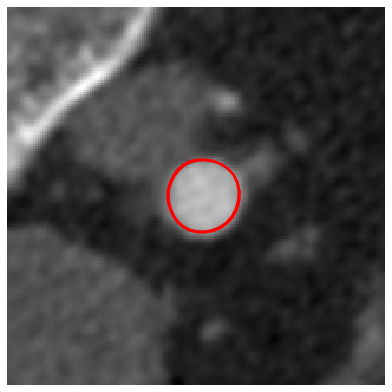

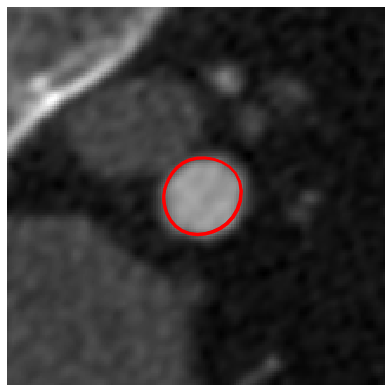

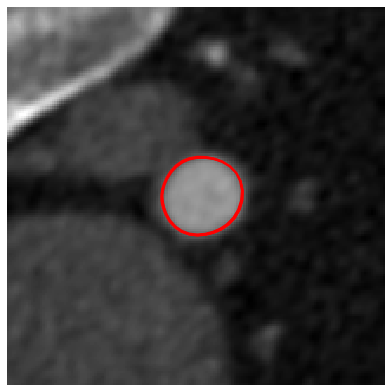

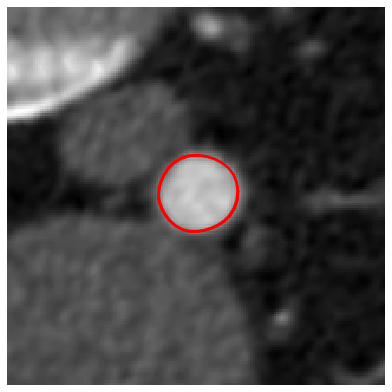

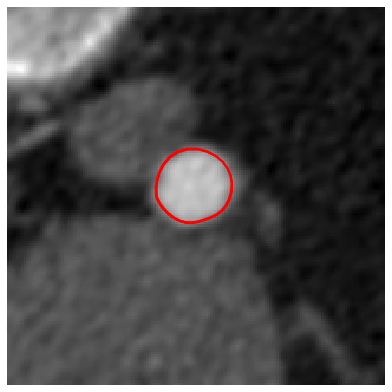

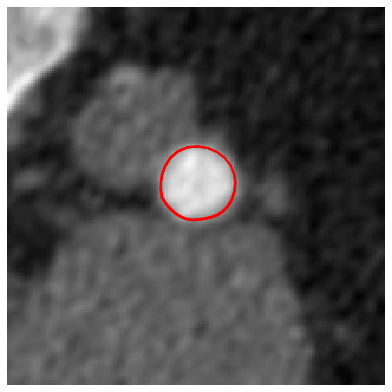

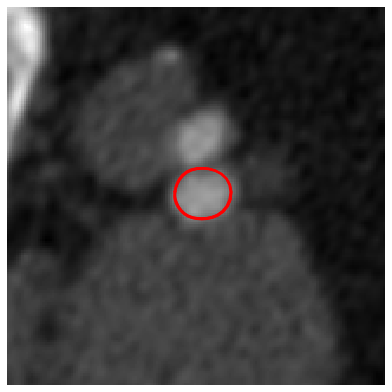

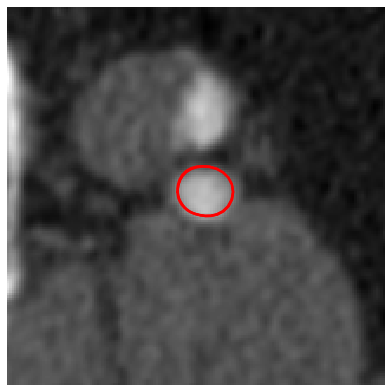

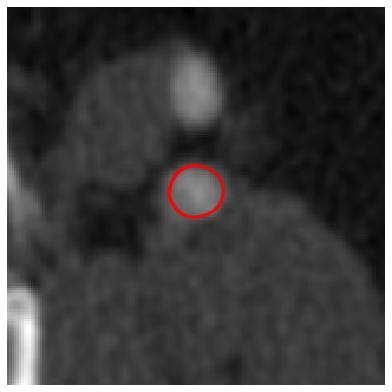

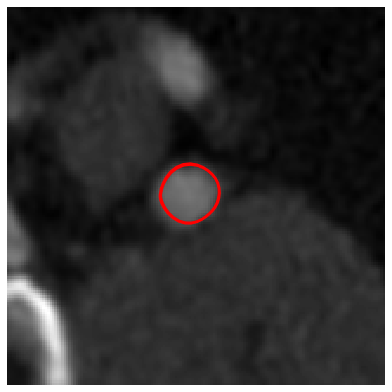

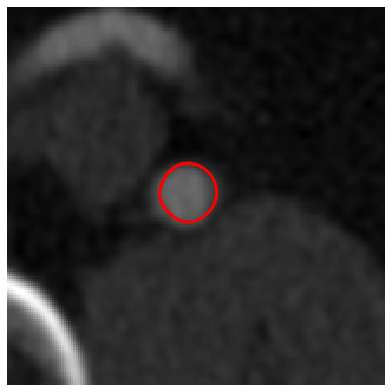

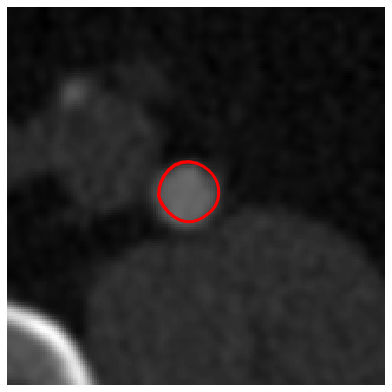

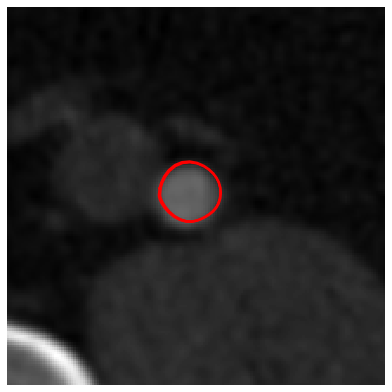

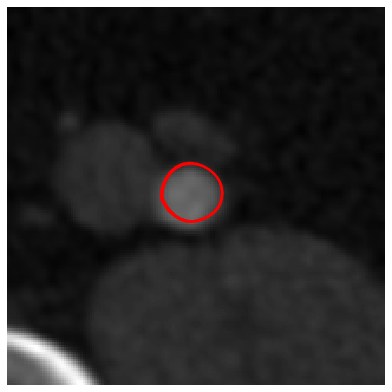

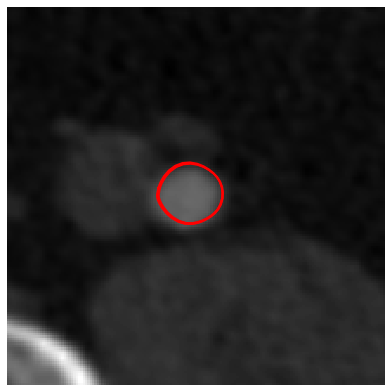

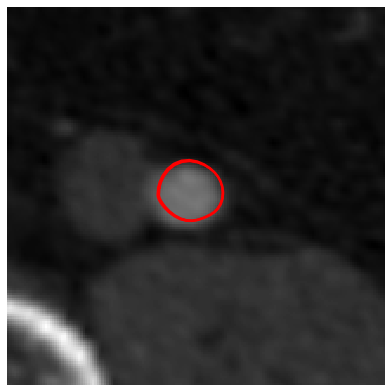

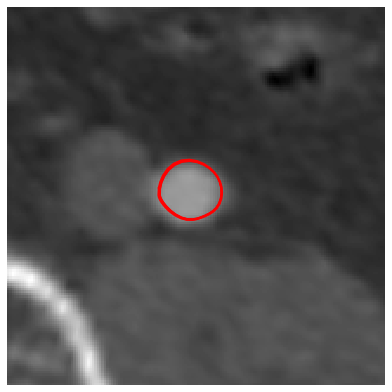

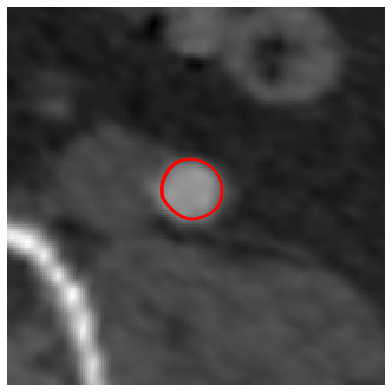

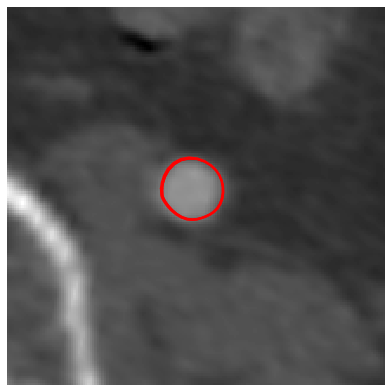

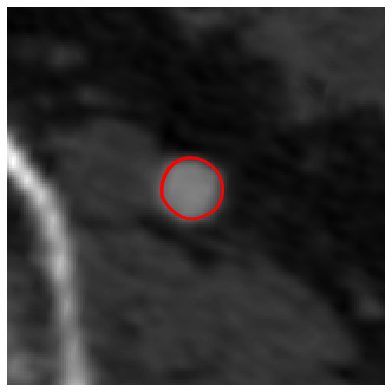

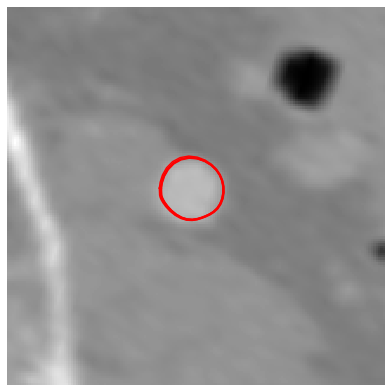

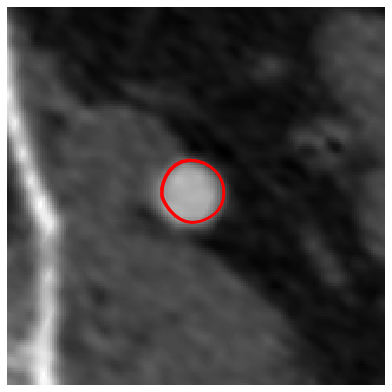

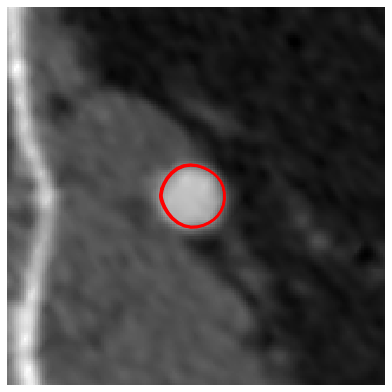

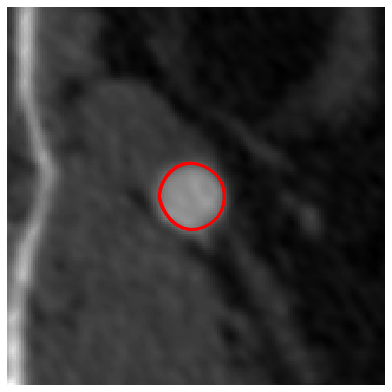

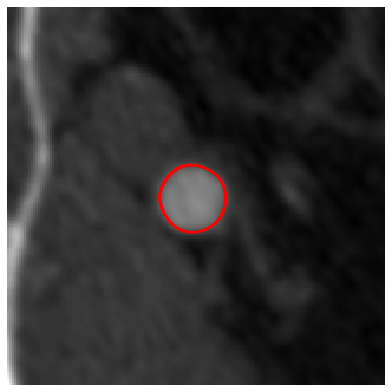

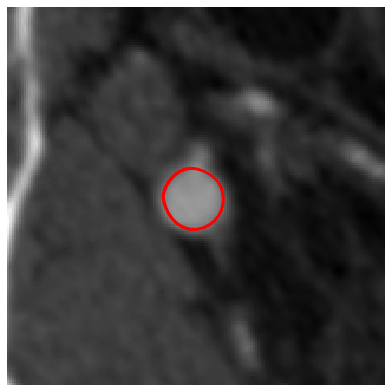

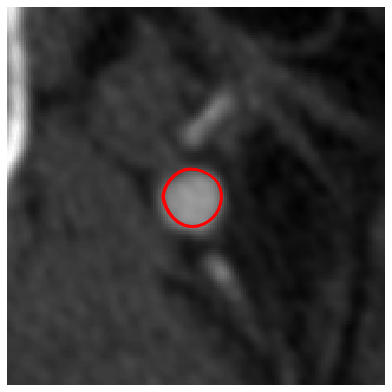

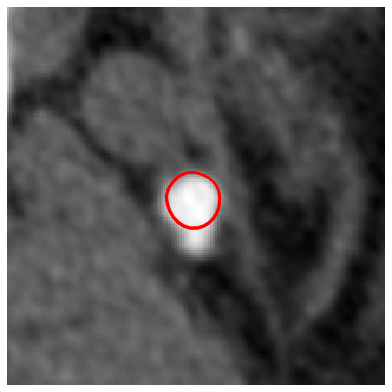

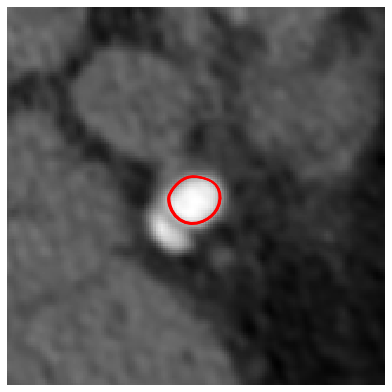

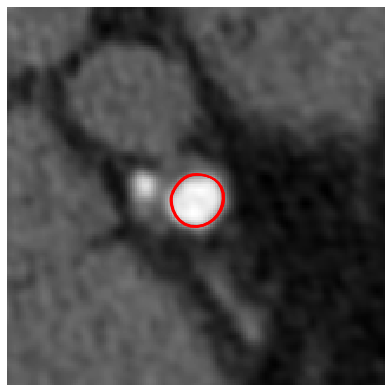

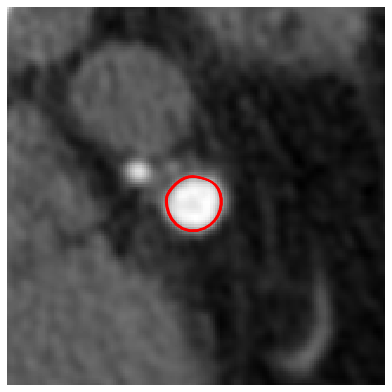

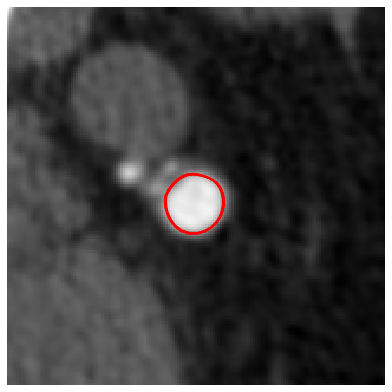

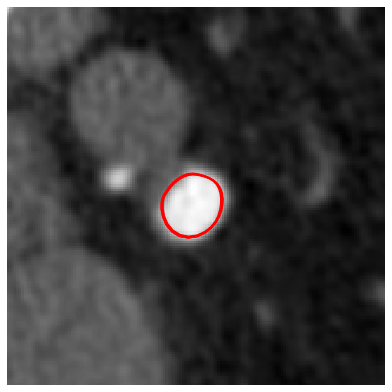

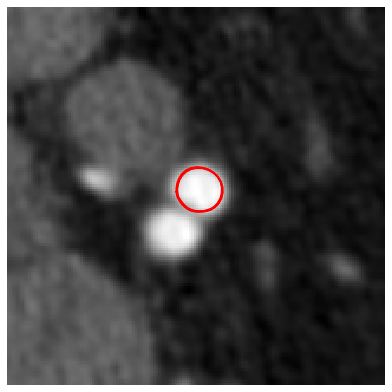

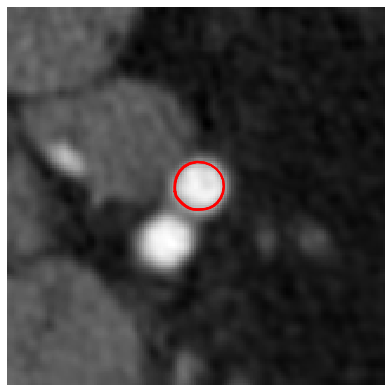

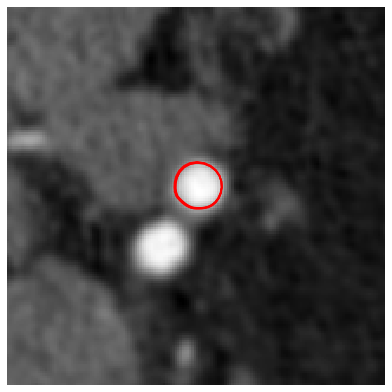

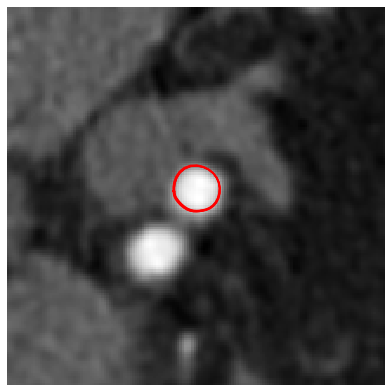

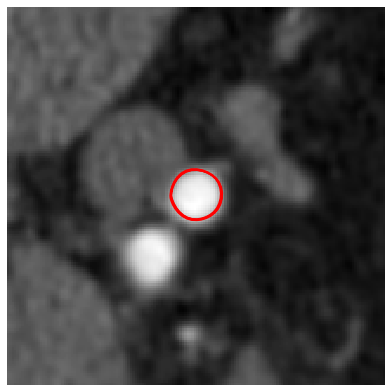

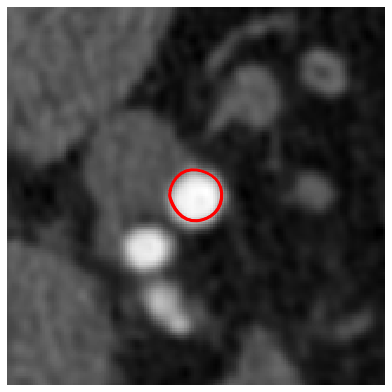

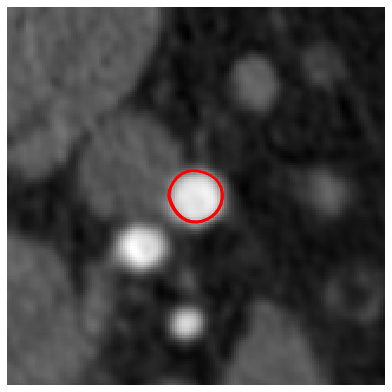

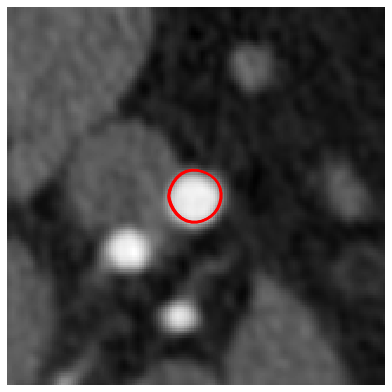

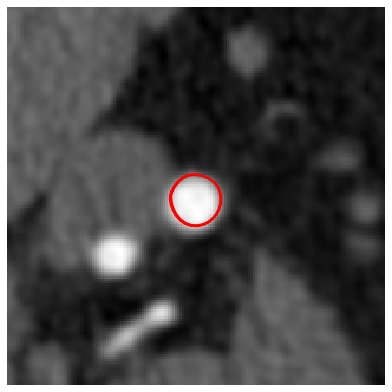

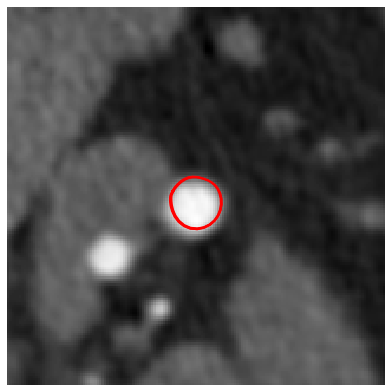

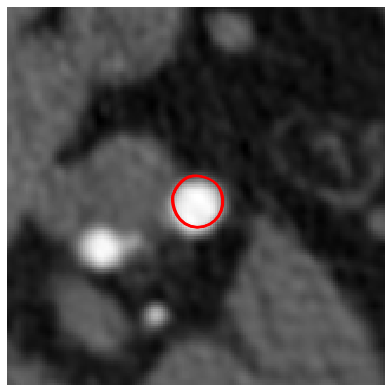

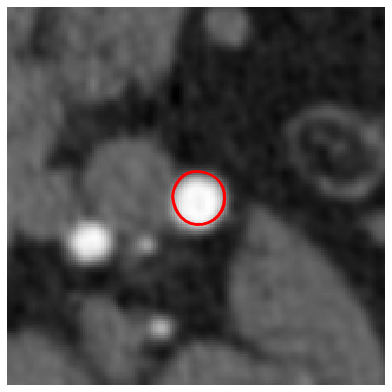

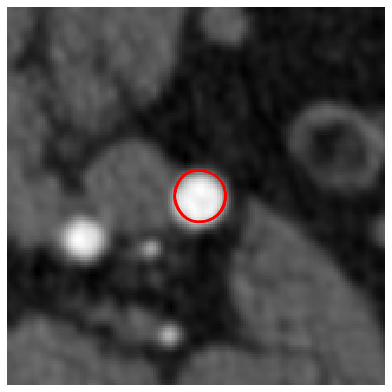

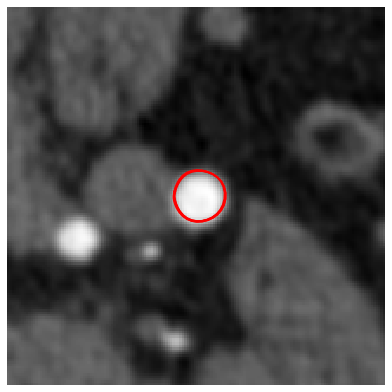

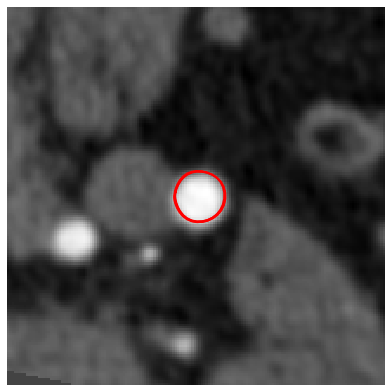

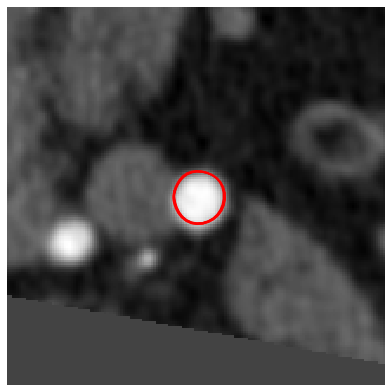

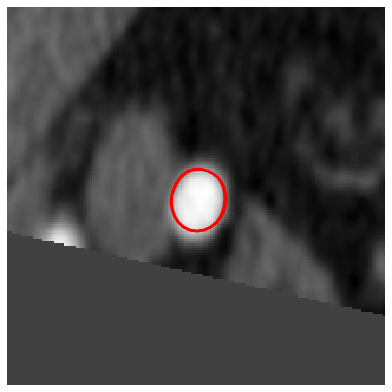

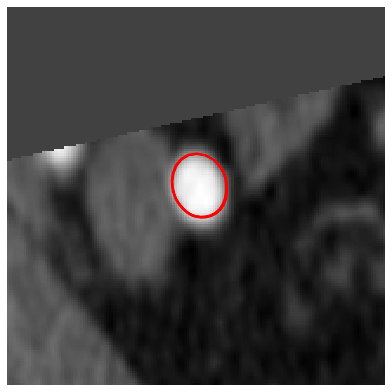

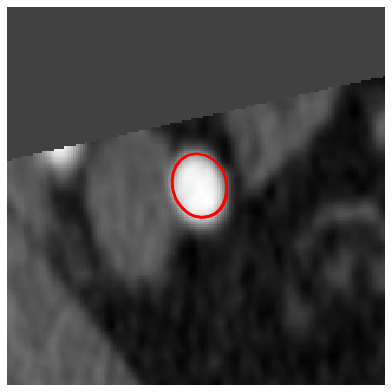

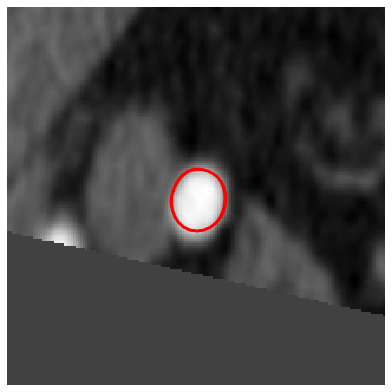

In [57]:
for i, p in enumerate(path_norm):
    id,x,n,t = p

    img_fn = OUT_DIR+'/'+id
    
    img = image.get_reslice(x,n,t)

    plt.figure(figsize=(6,6))
    plt.imshow(img,cmap='gray',extent=[-1,1,-1,1])

    for j,contour_list in enumerate(norm_groups):
        c = contour_list[i]
        plt.plot(c[:,0],c[:,1],color=COLORS[j])

    plt.tight_layout()
    plt.axis('off')
    plt.savefig(img_fn+'.png',dpi=200)
    plt.savefig(img_fn+'.pdf',dpi=200)
    plt.show()
    plt.close()